## Set interesting articles

In [2]:
%load_ext autoreload
%autoreload 2
from mongoengine import connect
from hatespeech_models import Tweet, Article

client = connect("hatespeech-labelling")
db = client["hatespeech-labelling"]

In [3]:
Article.objects.count()

34021

In [9]:
initial_query = {
    "comments__9__exists": True,
    #"comments__hateful_value__gt": 0.9
}
articles = Article.objects(**initial_query).search_text("Coronavirus COVID cuarentena").as_pymongo()
print(articles.count())

6231


In [10]:
articles = list(articles)

In [11]:
for article in articles:
    hateful_comments = [c for c in article["comments"] if c["hateful_value"] > 0.5]
    
    article["num_hateful_comments"] = len(hateful_comments)
    article["avg_hate_value"] = sum(c["hateful_value"] for c in article["comments"]) / len(article["comments"])


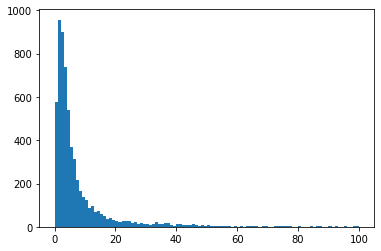

In [12]:
import matplotlib.pyplot as plt

plt.hist([c["num_hateful_comments"] for c in articles], range=[0, 100], bins=100);

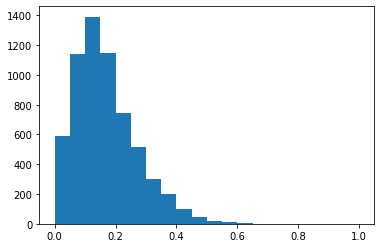

In [13]:
import matplotlib.pyplot as plt

plt.hist([c["avg_hate_value"] for c in articles], range=[0, 1], bins=20);

Elijo una muestra random

In [20]:
random.sample?

Signature: random.sample(population, k)
Docstring:
Chooses k unique random elements from a population sequence or set.

Returns a new list containing elements from the population while
leaving the original population unchanged.  The resulting list is
in selection order so that all sub-slices will also be valid random
samples.  This allows raffle winners (the sample) to be partitioned
into grand prize and second place winners (the subslices).

Members of the population need not be hashable or unique.  If the
population contains repeats, then each occurrence is a possible
selection in the sample.

To choose a sample in a range of integers, use range as an argument.
This is especially fast and space efficient for sampling from a
large population:   sample(range(10000000), 60)
File:      ~/.pyenv/versions/3.6.10/lib/python3.6/random.py
Type:      method


In [21]:
random.seed(2020)
selected_articles = random.sample(articles, 30)

In [22]:
len_comments = sum([len(art["comments"]) for art in selected_articles])

print(len_comments)

1104


Text(0.5, 1.0, 'Cantidad de comentarios')

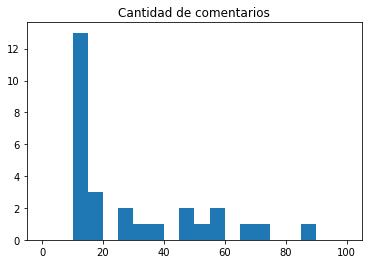

In [26]:
plt.hist([len(art["comments"]) for art in selected_articles], range=[0, 100], bins=20)
plt.title("Cantidad de comentarios")

Text(0.5, 1.0, 'Distribución de fechas de artículos')

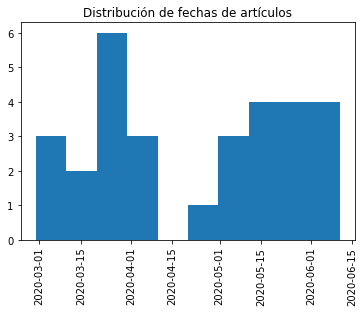

In [28]:

plt.hist([art["created_at"] for art in selected_articles])
plt.xticks(rotation=90);
plt.title("Distribución de fechas de artículos")

In [29]:
db.article.update_many({}, {"$set": {"selected": False}})

In [30]:
for article in selected_articles:
    db.article.update_one({"_id": article["_id"]}, {"$set": {"selected": True}})

In [31]:
db.article.create_index("selected")

'selected_1'